# Algorithm Performance Data Analysis - Run 4

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 60 | 0 | 
| max | 85 | 0.00020 | 
| step| 1 | 0.000005 | 
| iteration | 21 | 201 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231102_170039.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_170039,10404007.png,502730,294709,208021,0.413783,17,14,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000000
1,2,test_20231102_170039,1254659.png,342646,243901,98745,0.288184,10,11,0,0,0,0.0,9.336295,667.264725,19.887822,60,0.000000
2,3,test_20231102_170039,10188041.png,221231,40964,180267,0.814836,3,5,0,0,0,0.0,6.426028,324.603707,23.017269,60,0.000000
3,4,test_20231102_170039,10287332.png,216980,38574,178406,0.822223,2,5,0,0,0,0.0,7.202052,372.304629,22.421819,60,0.000000
4,5,test_20231102_170039,11610969.png,368720,158454,210266,0.570259,4,5,0,0,0,0.0,10.551970,747.336997,19.395639,60,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,6,test_20231102_183547,10350842.png,212614,24694,187920,0.883855,3,5,0,0,0,0.0,12.918491,1015.488379,18.064054,85,0.001995
103996,7,test_20231102_183547,10863862.png,317432,47576,269856,0.850122,4,5,0,0,0,0.0,16.967787,1698.346400,15.830541,85,0.001995
103997,8,test_20231102_183547,11382381.png,312486,6549,305937,0.979042,3,5,0,0,0,0.0,13.835753,1104.786064,17.698022,85,0.001995
103998,9,test_20231102_183547,11079715.png,443815,227914,215901,0.486466,6,6,0,0,0,0.0,11.664338,1018.971904,18.049182,85,0.001995


In [3]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.0,104000.0,104000.0,104000.0,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000
mean,5.500000,321053.700000,99043.962788,222009.737212,0.730923,3.422673,4.341115,0.0,0.0,0.0,0.0,11.514804,903.761676,19.001809,72.500000,0.000998
std,2.872295,92668.818376,93571.604085,59245.661664,0.206811,1.621315,0.965011,0.0,0.0,0.0,0.0,3.220499,417.134139,1.932506,7.500036,0.000577
min,1.000000,212614.000000,6246.000000,98745.000000,0.224679,1.000000,3.000000,0.0,0.0,0.0,0.0,6.426028,324.603707,14.595328,60.000000,0.000000
25%,3.000000,221231.000000,25741.000000,181411.000000,0.589047,2.000000,4.000000,0.0,0.0,0.0,0.0,9.339310,593.139456,17.787069,66.000000,0.000499
50%,5.500000,314959.000000,49374.000000,209824.500000,0.807888,3.000000,4.000000,0.0,0.0,0.0,0.0,11.305988,857.074560,18.800618,72.500000,0.000998
75%,8.000000,368720.000000,170409.000000,263324.000000,0.882298,4.000000,5.000000,0.0,0.0,0.0,0.0,12.806388,1082.364192,20.399235,79.000000,0.001496
max,10.000000,502730.000000,344099.000000,380671.000000,0.979042,35.000000,36.000000,0.0,0.0,0.0,0.0,21.012400,2257.083173,23.017269,85.000000,0.001995


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_170039,10404007.png,502730,294709,208021,0.413783,17,14,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000000
10,1,test_20231102_170039,10404007.png,502730,294709,208021,0.413783,8,5,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000005
20,1,test_20231102_170040,10404007.png,502730,294709,208021,0.413783,8,6,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000010
30,1,test_20231102_170041,10404007.png,502730,294709,208021,0.413783,5,5,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000015
40,1,test_20231102_170041,10404007.png,502730,294709,208021,0.413783,6,5,0,0,0,0.0,15.835868,1343.642101,16.847968,60,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103950,1,test_20231102_183545,10404007.png,502730,122059,380671,0.757208,5,6,0,0,0,0.0,21.012400,2257.083173,14.595328,85,0.001975
103960,1,test_20231102_183545,10404007.png,502730,122059,380671,0.757208,4,5,0,0,0,0.0,21.012400,2257.083173,14.595328,85,0.001980
103970,1,test_20231102_183546,10404007.png,502730,122059,380671,0.757208,5,6,0,0,0,0.0,21.012400,2257.083173,14.595328,85,0.001985
103980,1,test_20231102_183546,10404007.png,502730,122059,380671,0.757208,5,5,0,0,0,0.0,21.012400,2257.083173,14.595328,85,0.001990


In [6]:
# # List of metrics interested in
# metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# # Create a separate plot for each metric
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
    
#     # Group by AllowedExceedingThresholdFactor and plot
#     for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
#         plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
#     plt.title(f'{image_name} - {metric}')
#     plt.xlabel('QuadtreeThreshold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.grid(True)
#     plt.show()


## Analyze per Test

In [7]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_18448/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [8]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231102_170039,60,0.000000,5.5,321053.7,131883.9,189169.8,0.641988,5.3,6.2,0.0,0.0,0.0,0.0,9.653004,632.500765,20.488241
1,test_20231102_170039,60,0.000005,5.5,321053.7,131883.9,189169.8,0.641988,3.7,4.7,0.0,0.0,0.0,0.0,9.653004,632.500765,20.488241
2,test_20231102_170040,60,0.000010,5.5,321053.7,131883.9,189169.8,0.641988,3.9,4.2,0.0,0.0,0.0,0.0,9.653004,632.500765,20.488241
3,test_20231102_170041,60,0.000015,5.5,321053.7,131883.9,189169.8,0.641988,3.2,4.3,0.0,0.0,0.0,0.0,9.653004,632.500765,20.488241
4,test_20231102_170041,60,0.000020,5.5,321053.7,131883.9,189169.8,0.641988,4.2,4.0,0.0,0.0,0.0,0.0,9.653004,632.500765,20.488241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,test_20231102_183545,85,0.001975,5.5,321053.7,72535.1,248518.6,0.802727,3.8,5.3,0.0,0.0,0.0,0.0,13.389253,1202.789682,17.692522
10396,test_20231102_183545,85,0.001980,5.5,321053.7,72535.1,248518.6,0.802727,3.4,4.5,0.0,0.0,0.0,0.0,13.389253,1202.789682,17.692522
10397,test_20231102_183546,85,0.001985,5.5,321053.7,72535.1,248518.6,0.802727,4.4,6.0,0.0,0.0,0.0,0.0,13.389253,1202.789682,17.692522
10398,test_20231102_183546,85,0.001990,5.5,321053.7,72535.1,248518.6,0.802727,3.8,5.3,0.0,0.0,0.0,0.0,13.389253,1202.789682,17.692522


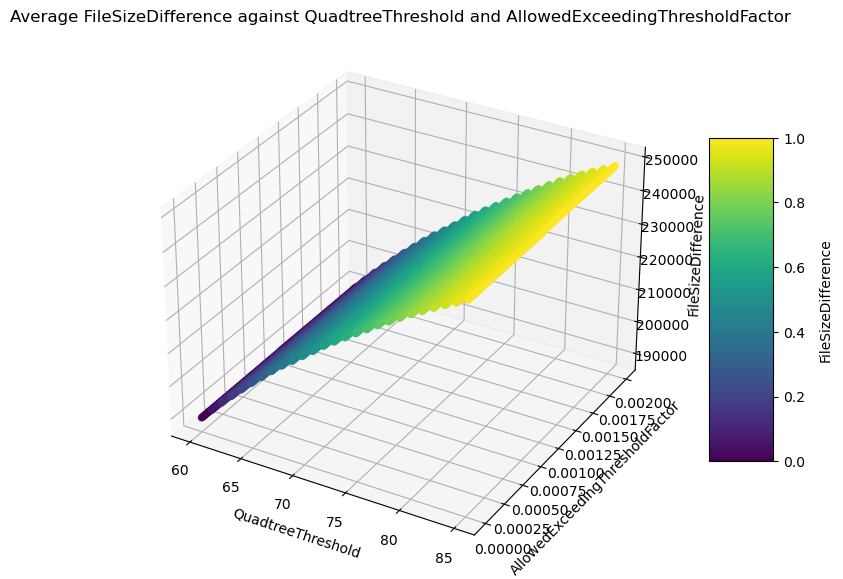

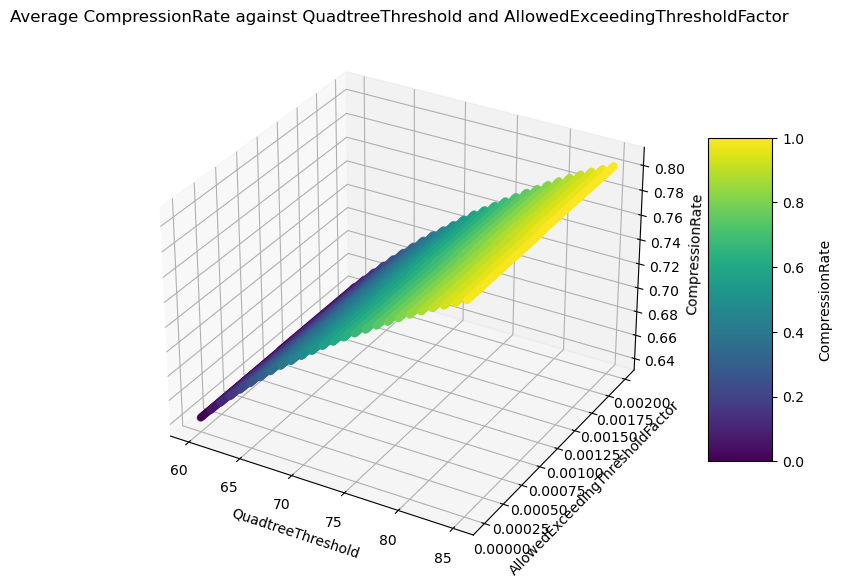

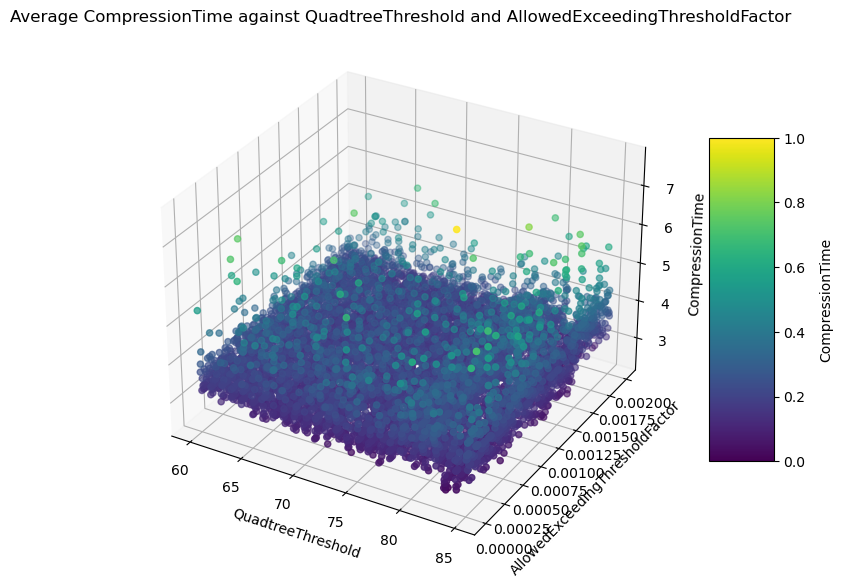

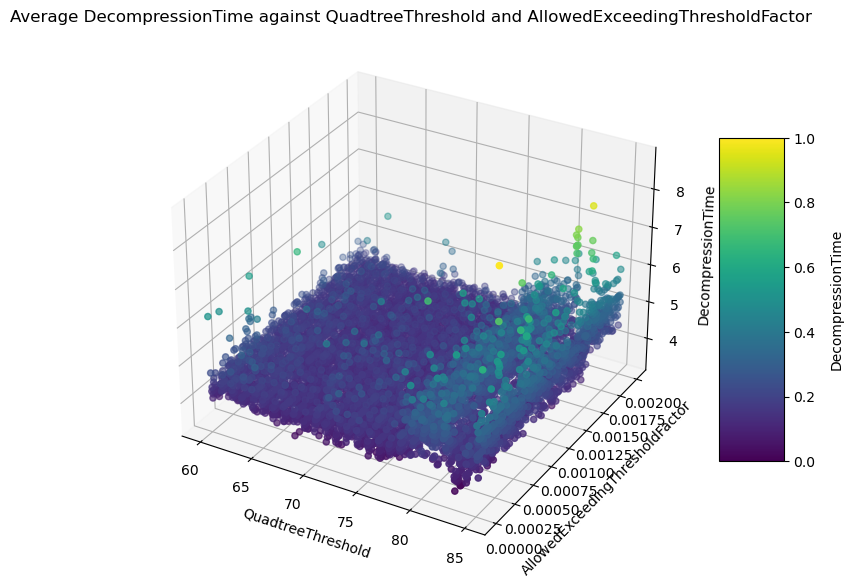

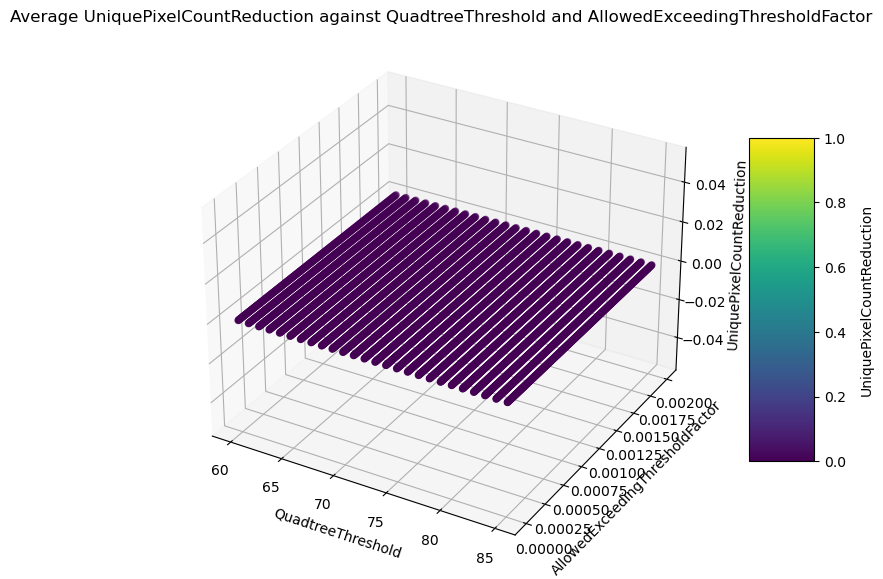

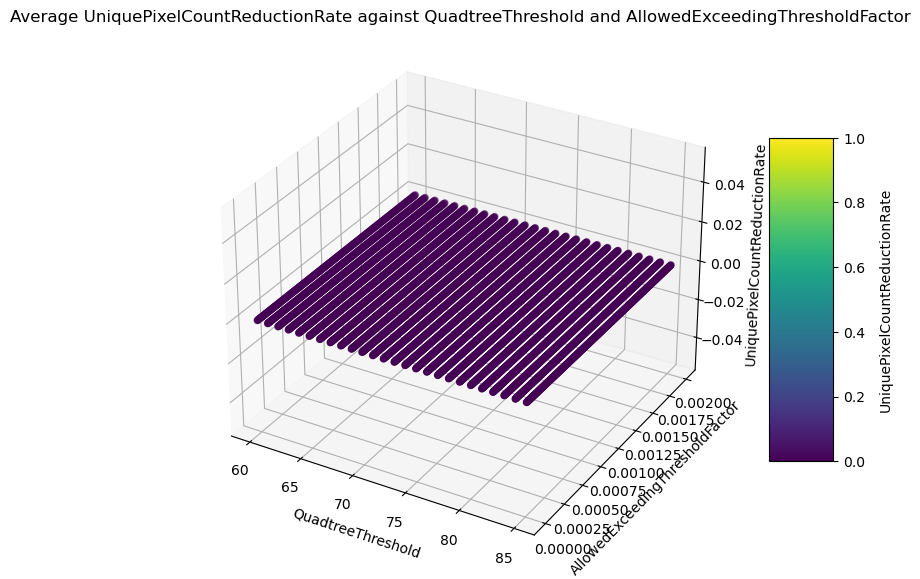

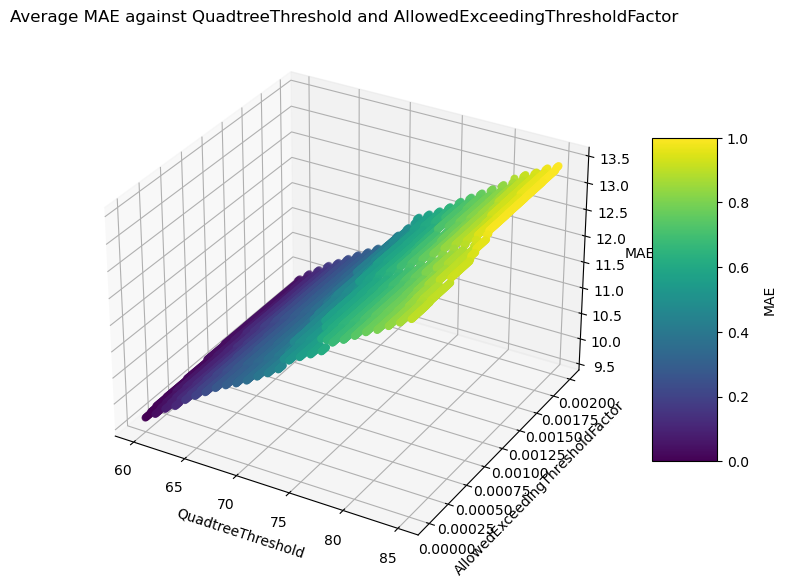

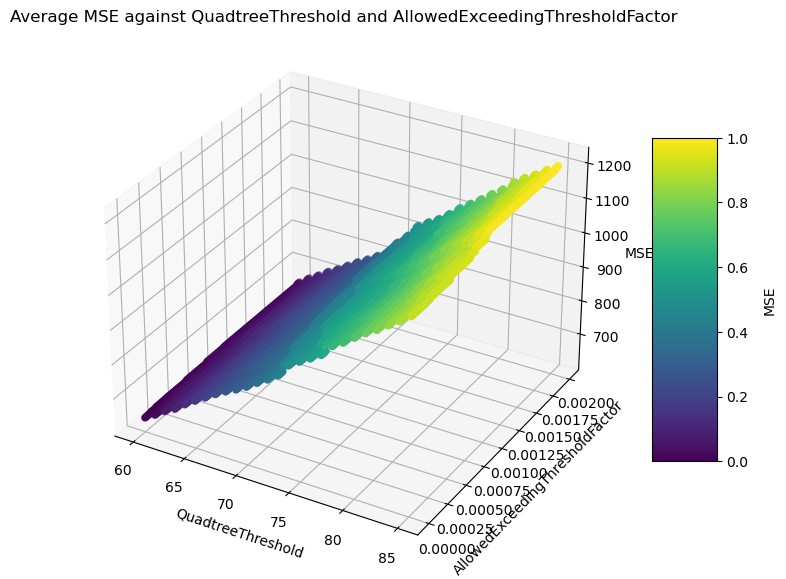

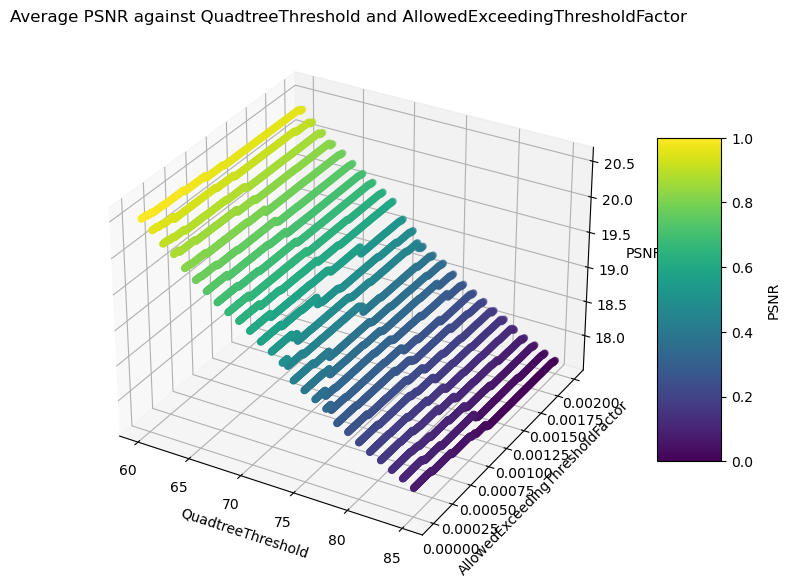

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


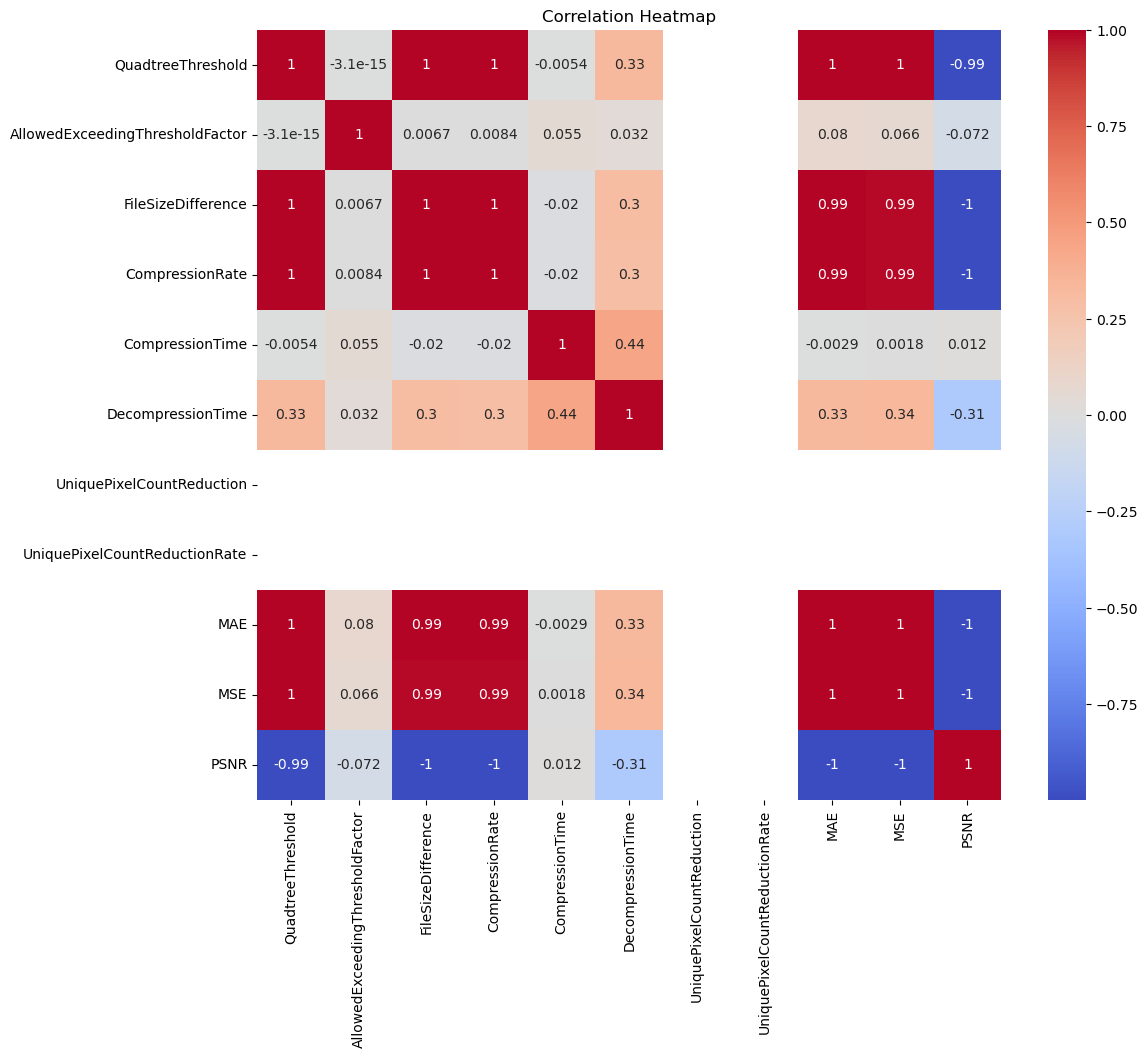

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [11]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

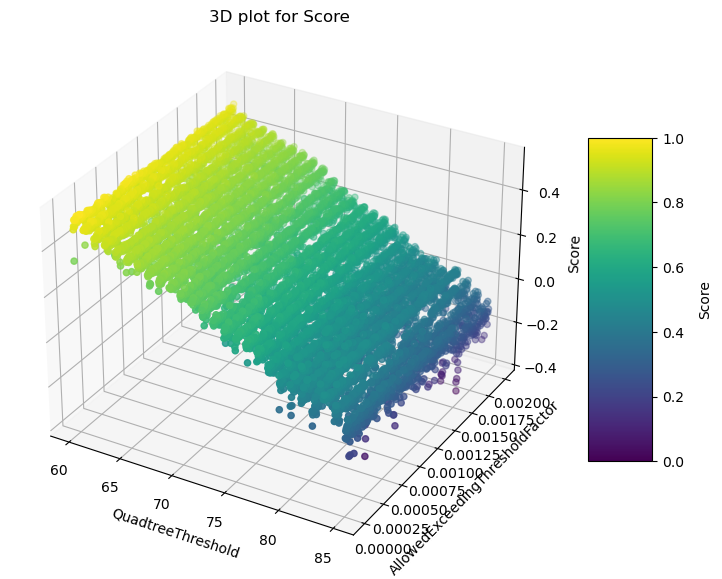

In [12]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

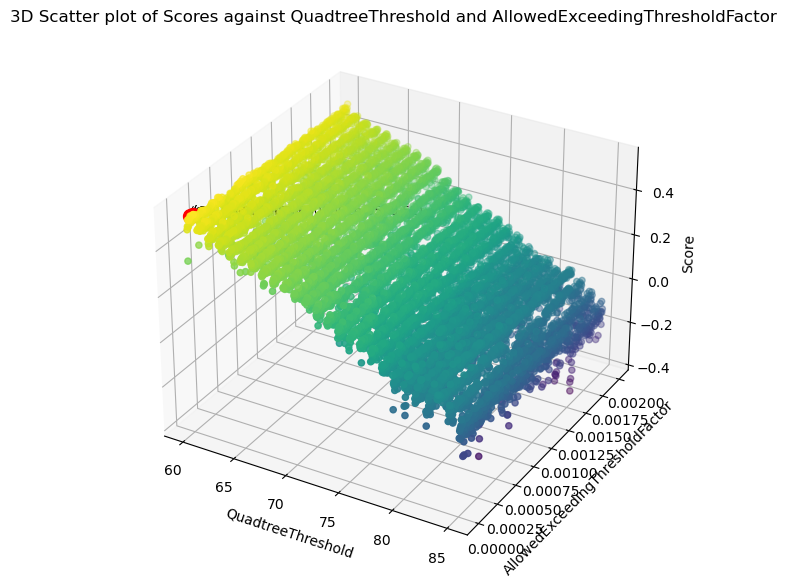

In [13]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [14]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
9                  60                         0.000045  0.522740
16                 60                         0.000080  0.519504
15                 60                         0.000075  0.519420
